<a href="https://colab.research.google.com/github/n23950629/My-python-work/blob/master/functional_API_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 初始準備

In [0]:
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D, MaxPool2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import SGD, Adam


from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import concatenate, add

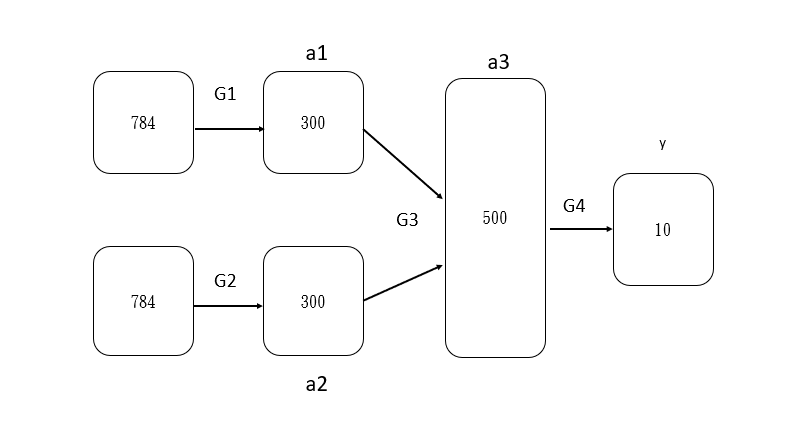

$a1 = g1(x)$

$a2 = g2(x)$

$a3 = g3(a1,a2)$

$y = g4(a3)$

In [0]:
g1 = Dense(300, activation='relu')
g2 = Dense(300, activation='relu')
g3 = Dense(600, activation='sigmoid')
g4 = Dense(10, activation='softmax')

In [69]:
x = Input(shape=(784,))
print(x)

a1 = g1(x)
a2 = g2(x)

e = concatenate([a1,a2])
a3 = g3(e)

y = g4(a3)
print(y)

Tensor("input_6:0", shape=(None, 784), dtype=float32)
Tensor("dense_19/Identity:0", shape=(None, 10), dtype=float32)


### 看一下我們 model 的長相

In [70]:
model = Model(x, y)
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 784)]        0                                            
__________________________________________________________________________________________________
dense_16 (Dense)                (None, 300)          235500      input_6[0][0]                    
__________________________________________________________________________________________________
dense_17 (Dense)                (None, 300)          235500      input_6[0][0]                    
__________________________________________________________________________________________________
concatenate_4 (Concatenate)     (None, 600)          0           dense_16[0][0]                   
                                                                 dense_17[0][0]             

In [0]:
model.compile(
    loss='categorical_crossentropy',
    optimizer = Adam(),
    metrics = ['accuracy']
)

### 載入資料集

In [0]:
(x_train, y_train), (x_test, y_test) = datasets.fashion_mnist.load_data()

In [73]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [0]:
(x_train, y_train0), (x_test, y_test0) = datasets.fashion_mnist.load_data()

In [0]:
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

In [76]:
x_train = x_train / x_train.max()
x_test = x_test / x_test.max()
print(x_train.shape)

(60000, 784)


In [0]:
y_train = to_categorical(y_train0, 10)
y_test = to_categorical(y_test0, 10)

### 訓練步驟

In [78]:
model.fit( x_train, y_train, batch_size = 256, epochs = 5 )

Epoch 1/5
235/235 [==============================] - 7s 31ms/step - loss: 0.5371 - accuracy: 0.8090
Epoch 2/5
235/235 [==============================] - 7s 31ms/step - loss: 0.3723 - accuracy: 0.8650
Epoch 3/5
235/235 [==============================] - 7s 31ms/step - loss: 0.3297 - accuracy: 0.8796
Epoch 4/5
235/235 [==============================] - 7s 31ms/step - loss: 0.3098 - accuracy: 0.8859
Epoch 5/5
235/235 [==============================] - 8s 33ms/step - loss: 0.2826 - accuracy: 0.8955


In [81]:
score = model.evaluate(x_train, y_train, batch_size=10000)
print(f'Accuracy: {score[1]*100}')

6/6 [==============================] - 2s 265ms/step - loss: 0.2755 - accuracy: 0.8967
Accuracy: 89.67499732971191
